In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!kaggle datasets download -d ivansher/nasa-nearest-earth-objects-1910-2024

Dataset URL: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024
License(s): CC0-1.0
 84% 11.0M/13.0M [00:00<00:00, 54.6MB/s]
100% 13.0M/13.0M [00:00<00:00, 52.0MB/s]


In [3]:
df = pd.read_csv('/content/nasa-nearest-earth-objects-1910-2024.zip')

In [4]:
# metadata

print(f"Shape of dataframe: {df.shape}")

num_entries = df.shape[0]
feature_names = df.columns.tolist()

print(f"Number of entries: {num_entries}")
print(f"Feature names: {feature_names}")


print(df.describe())
print(df.info())

Shape of dataframe: (338199, 9)
Number of entries: 338199
Feature names: ['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'orbiting_body', 'relative_velocity', 'miss_distance', 'is_hazardous']
             neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.3528

In [5]:
# data sanitization
print(df.isna().sum())

# remove null rows and duplicates
df_clean = df.dropna().drop_duplicates()
df_clean.reset_index(inplace = True, drop = True)

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


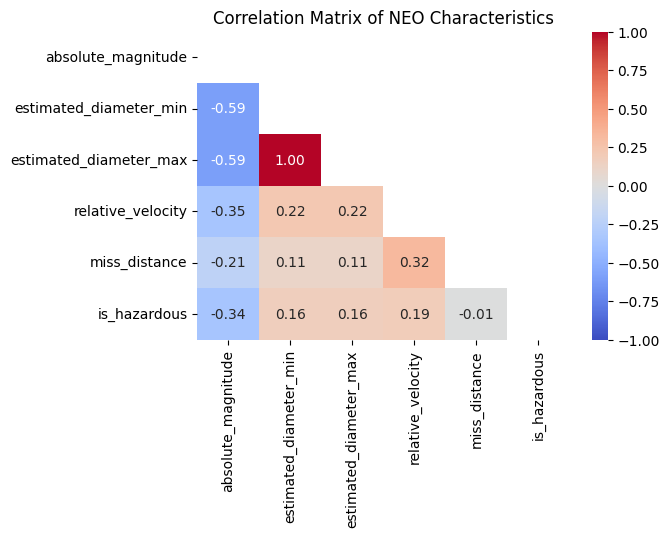

In [6]:
# correlation plot of relevant features to hazard classification

correlation_matrix = df_clean[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr()

plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt='.2f',
    mask = np.triu(correlation_matrix)
)

plt.title('Correlation Matrix of NEO Characteristics')
plt.show()

In [7]:
# keep only hazardous, diameter, relative velocity
df_clean = df_clean[df_clean['is_hazardous']]
df_clean = df_clean[['estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']]
print(df_clean)

# filter extreme outliers
for col in df_clean.select_dtypes(exclude='object'):
  Q1 = df[col].quantile(0.10)
  Q3 = df[col].quantile(0.90)
  IQR = Q3 - Q1

  # Define the bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

df_clean.describe()

        estimated_diameter_min  estimated_diameter_max  relative_velocity
1                     0.530341                1.185878      109949.757148
6                     0.133216                0.297879       57853.295346
8                     0.121494                0.271669       37424.548382
11                    0.133216                0.297879       57853.295743
19                    0.368600                0.824214       59133.776590
...                        ...                     ...                ...
338121                1.724070                3.855138       93176.009539
338142                0.576176                1.288368       31245.887432
338143                0.270742                0.605397       82457.667589
338161                0.218049                0.487573       54747.600249
338163                0.218049                0.487573       54747.577829

[43162 rows x 3 columns]


,estimated_diameter_min,estimated_diameter_max,relative_velocity
count,41589.000000,41589.000000,41589.000000
mean,0.249066,0.556928,63483.526669
std,0.152889,0.341870,27560.263552
min,0.082519,0.184519,3888.602813
25%,0.140785,0.314804,43254.788263
50%,0.195234,0.436556,59511.518202
75%,0.305179,0.682402,79766.048559
max,0.900648,2.013910,183514.248154


In [8]:
average_diameter = (df_clean['estimated_diameter_min'].median() + df_clean['estimated_diameter_max'].median()) / 2

print(average_diameter*1000)

315.89490175000003


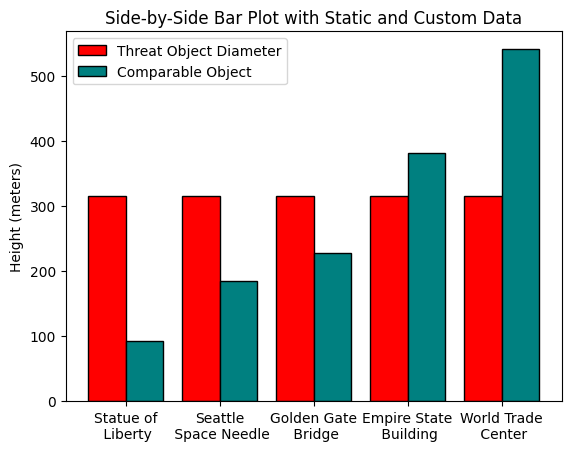

In [10]:
data = {'CompareData': [93, 184, 227, 381, 541],
        'CompareName': ['Statue of\n Liberty', 'Seattle\n Space Needle', "Golden Gate\n Bridge", 'Empire State\n Building', 'World Trade\n Center']}
df_compare = pd.DataFrame(data)

static_value = average_diameter * 1000

bar_width = 0.4
index = np.arange(len(df_compare['CompareData']))

fig, ax = plt.subplots()

bars1 = ax.bar(index - bar_width/2, static_value, bar_width, label='Threat Object Diameter', color='red', edgecolor='black')

bars2 = ax.bar(index + bar_width/2, df_compare['CompareData'], bar_width, label='Comparable Object', color='teal', edgecolor='black')

ax.set_ylabel('Height (meters)')
ax.set_title('Side-by-Side Bar Plot with Static and Custom Data')
ax.set_xticks(index)
ax.set_xticklabels(df_compare['CompareName'])
ax.legend()

plt.show()